## Naver Movie Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', sep='\t')
test_df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt', sep='\t')

In [3]:
train_df.shape, test_df.shape
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


#### Preprocessing

In [4]:
# Null 데이터가 있는지 확인
train_df.isna().sum()

id          0
document    5
label       0
dtype: int64

In [5]:
# Null 데이터 제거
train_df.dropna(how='any', inplace=True) 
train_df.shape

(149995, 3)

In [6]:
# 중복여부 확인
train_df.document.nunique()

146182

In [7]:
# 중복 데이터 제거
train_df.drop_duplicates(subset=['document'], inplace=True) 
train_df.shape

(146182, 3)

In [8]:
# 긍정(1)/부정(0) 분포
train_df.label.value_counts()

0    73342
1    72840
Name: label, dtype: int64

In [9]:
# Test Set
print(test_df.isna().sum())
test_df.dropna(how='any', inplace=True)
print(test_df.document.nunique())
test_df.drop_duplicates(subset=['document'], inplace=True)
print(test_df.shape)
test_df.label.value_counts()

id          0
document    3
label       0
dtype: int64
49157
(49157, 3)


1    24711
0    24446
Name: label, dtype: int64

#### Korean Preprocess

In [10]:
train_df.document = train_df.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ').str.strip()
train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [11]:
train_df.document.replace('', np.nan, inplace=True)
train_df.document.isna().sum()

789

In [12]:
train_df.dropna(how='any', inplace=True)
train_df.shape

(145393, 3)

In [13]:
test_df.document = test_df.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ').str.strip()
test_df.document.replace('', np.nan, inplace=True)
test_df.dropna(how='any', inplace=True)
test_df.shape

(48852, 3)

In [14]:
from konlpy.tag import Okt
okt = Okt()

In [15]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','을','ㅋㅋ','ㅠㅠ','ㅎㅎ']

In [30]:
from tqdm.notebook import tqdm

X_train = []
for sentence in tqdm(train_df.document):
    morphs = okt.morphs(sentence, stem=True)
    tmp_str = ' '.join([word for word in morphs if word not in stopwords])
    X_train.append(tmp_str)
X_train

  0%|          | 0/145393 [00:00<?, ?it/s]

['아 더빙 진짜 짜증나다 목소리',
 '흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍다 않다',
 '너 무재 밓었 다그 래서 보다 추천 다',
 '교도소 이야기 구먼 솔직하다 재미 없다 평점 조정',
 '사이 몬페 그 익살스럽다 연기 돋보이다 영화 스파이더맨 에서 늙다 보이다 커스틴 던스트 너무나도 이쁘다 보이다',
 '막 걸음 마 떼다 세 부터 초등학교 학년 생인 살다 영화 ㅋㅋㅋ 별 반개 아깝다 움',
 '원작 긴장감 제대로 살리다',
 '별 반개 아깝다 욕 나오다 이응경 길용우 연 기 생활 몇 년 인지 정말 발 로 해도 그것 보단 낫다 납치 감금 만 반복 반복 드라마 가족 없다 연기 못 사람 만 모 엿 네',
 '액션 없다 재미 있다 몇 안되다 영화',
 '왜케 평점 낮다 꽤 볼 만 데 헐리우드 식 화려하다 너무 길들이다 있다',
 '인피니트 짱 이다 진짜 짱 이다',
 '볼때 마다 눈물나다 죽다 년대 향수 자극 허진호 감성 절제 멜로 달인 이다',
 '울면 서 손 고 횡단보도 건너다 때 뛰다 치다 올 뻔 이범수 연기 드럽다 못',
 '담백하다 깔끔하다 좋다 신 문 기 사 로만 보다 보다 자꾸 잊어버리다 그 사람 이다 것',
 '취향 존중 다지 만 진짜 내생 극장 에서 보다 영화 중 가장 노잼 노 감동 임 스토리 어거지 고 감동 어거지',
 'ㄱ 냥 매번 긴장 되다 재밋음',
 '차다 사람 웃기다 바스코 이기 면 락스 코 라고 끄다 바비 이기 면 아이돌 이라고 깔다 그냥 끄다 안달 난 것 처럼 보이다',
 '굿바이 레닌 표절 인 것 이해 왜 뒤 로 갈수록 재미 없어지다',
 '이건 정말 깨알 캐스팅 질퍽 하 지 않다 산뜻하다 내 용구성 자다 버무러진 깨알 일드',
 '약탈 위 변명 이르다 저 놈 착하다 놈 절대 아니다 걸 요',
 '나름 심오하다 뜻 있다 듯 그냥 학생 선생 놀다 영화 절대 아니다',
 '보다 웃다 않다 건 불가능하다',
 '재미없다 지루하다 같다 음식 영화 인데 바베트 만찬 하고 넘다 차이나다 바베트 만찬 이야기 있다 음식 보다 

In [31]:
X_test = []
for sentence in tqdm(test_df.document):
    morphs = okt.morphs(sentence, stem=True)
    tmp_str = ' '.join([word for word in morphs if word not in stopwords])
    X_test.append(tmp_str)

  0%|          | 0/48852 [00:00<?, ?it/s]

In [18]:
y_train = train_df.label.values 
y_test = test_df.label.values

In [19]:
from eunjeon import Mecab
mecab = Mecab()

In [20]:
X_train_Mecab = []
for sentence in tqdm(train_df.document):
    morphs = mecab.morphs(sentence)
    tmp_str = ' '.join([word for word in morphs if word not in stopwords])
    X_train_Mecab.append(tmp_str)
X_train_Mecab

  0%|          | 0/145393 [00:00<?, ?it/s]

['아 더 빙 진짜 짜증 나 네요 목소리',
 '흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍 지 않 구나',
 '너무 재 밓었 다 그래서 보 것 추천 한다',
 '교도소 이야기 구먼 솔직히 재미 없 다 평점 조정',
 '사이몬페그 익살 스런 연기 돋보였 던 영화 스파이더맨 에서 늙 어 보이 기 만 했 던 커스틴 던스트 너무나 이뻐 보였 다',
 '막 걸음마 뗀 세 부터 초등 학교 학년 생 인 살용 영화 ㅋㅋㅋ 별반 개 아까움',
 '원작 긴장감 제대로 살려 내 지 못했 다',
 '별 반개 아깝 다 욕 나온다 이응경 길용우 연기 생활 몇 년 인지 정말 발 로 해도 그것 보단 낫 겟 다 납치 감금 만 반복 반복 드라마 가족 없 다 연기 못 하 사람 만 모엿 네',
 '액션 없 는데 재미 있 몇 안 되 영화',
 '왜 케 평점 낮 건데 꽤 볼 만 한데 헐리우드 식 화려 함 만 너무 길들여져 있 나',
 '걍인피니트가짱이다 진짜 짱 다',
 '볼 때 마다 눈물나 서 죽 겠 다 년 대 향수 자극 허진호 감성 절제 멜로 달인 다',
 '울 면서 손들 고 횡단보도 건널 때 뛰쳐나올 뻔 이범수 연기 드럽 게 못해',
 '담백 하 고 깔끔 해서 좋 다 신문 기사 로 만 보다 보 면 자꾸 잊어버린다 그 사람 었 다는 것',
 '취향 존중 한다지만 진짜 내생 극장 에서 본 영화 중 가장 노 잼 노 감동 임 스토리 어 거지 고 감동 어거지',
 'ㄱ 냥 매번 긴장 되 고 재 밋 음',
 '참 사람 웃긴 게 바스코 이기면 락스 코 라고 까 고 바비 이기면 아이돌 라고 깐다 그냥 까 고 싶 어서 안달 난 것 처럼 보인다',
 '굿바이 레닌 표절 인 것 이해 하 는데 왜 뒤 로 갈수록 재미없 어 지 냐',
 '이건 정말 깨알 캐스팅 질퍽 하 지 않 산뜻 내용 구성 버 무 러진 깨알 일 드',
 '약탈자 위한 변명 라 저놈 착한 놈 절대 아닌걸요',
 '나름 심오 뜻 있 듯 그냥 학생 선생 놀아나 영화 절대 아님',
 '보 면서 웃 지 않 건 불 가능 하 다',
 '재미없 다 지루

#### Keras Tokenizer → Train / Test Dataset

In [32]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)

In [34]:
len(t.word_index)

43118

In [35]:
# 상위 20,000개 단어로 인코딩
num_words = 20000
t = Tokenizer(num_words=num_words)
t.fit_on_texts(X_train)

In [36]:
X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)
len(X_train), len(X_test)

(145393, 48852)

In [37]:
# 데이터의 최대 / 평균 길이
max(len(s) for s in X_train), sum(map(len, X_train)) / len(X_train)

(70, 10.610139415240074)

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 40
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
X_train.shape, X_test.shape

((145393, 40), (48852, 40))

#### Modeling

In [39]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=2022
)

In [41]:
model = Sequential([
    Embedding(num_words, 120, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 120)           2400000   
                                                                 
 lstm (LSTM)                 (None, 128)               127488    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,527,617
Trainable params: 2,527,617
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

model_path = './models/best-naver-LSTM.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                epochs=100, batch_size=128, callbacks=[es, mc])

Epoch 1/100
909/909 [==============================] - ETA: 0s - loss: 0.3932 - accuracy: 0.8217
Epoch 00001: val_loss improved from inf to 0.35792, saving model to ./models\best-naver-LSTM.h5
909/909 [==============================] - 13s 10ms/step - loss: 0.3932 - accuracy: 0.8217 - val_loss: 0.3579 - val_accuracy: 0.8428
Epoch 2/100
909/909 [==============================] - ETA: 0s - loss: 0.3032 - accuracy: 0.8706
Epoch 00002: val_loss improved from 0.35792 to 0.34367, saving model to ./models\best-naver-LSTM.h5
909/909 [==============================] - 9s 9ms/step - loss: 0.3032 - accuracy: 0.8706 - val_loss: 0.3437 - val_accuracy: 0.8505
Epoch 3/100
903/909 [============================>.] - ETA: 0s - loss: 0.2542 - accuracy: 0.8930
Epoch 00003: val_loss did not improve from 0.34367
909/909 [==============================] - 8s 9ms/step - loss: 0.2545 - accuracy: 0.8929 - val_loss: 0.3586 - val_accuracy: 0.8501
Epoch 4/100
905/909 [============================>.] - ETA: 0s - lo

In [43]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

1527/1527 [==============================] - 6s 4ms/step - loss: 0.3477 - accuracy: 0.8492


[0.34765738248825073, 0.8492385149002075]

#### 실제 데이터 예측

In [45]:
review = '이 영화 개꿀잼 ㅋㅋㅋ'

import re
review = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',review).strip()

morphs = okt.morphs(review, stem=True)
morphs = [word for word in morphs if word not in stopwords]
encoded = t.texts_to_sequences([morphs])
padded = pad_sequences(encoded, maxlen=max_len)
score = float(best_model.predict(padded)) # best_model.predict(padded)[0][0]
print('긍정' if score > 0.5 else '부정')

긍정


In [46]:
def sentiment_predict(review, tokenizer=t, max_len=max_len):
    review = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',review).strip()
    morphs = okt.morphs(review, stem=True)
    morphs = [word for word in morphs if word not in stopwords]
    encoded = tokenizer.texts_to_sequences([morphs])
    padded = pad_sequences(encoded, maxlen=max_len)
    score = float(best_model.predict(padded))
    return f'긍정({score*100:.2f}%)' if score > 0.5 else f'부정({(1-score)*100:.2f}%)'

In [47]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

'긍정(94.56%)'

In [48]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

'부정(99.22%)'

#### Visualization

In [50]:
y_acc = hist.history['accuracy']
y_loss = hist.history['loss']
y_vacc = hist.history['val_accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

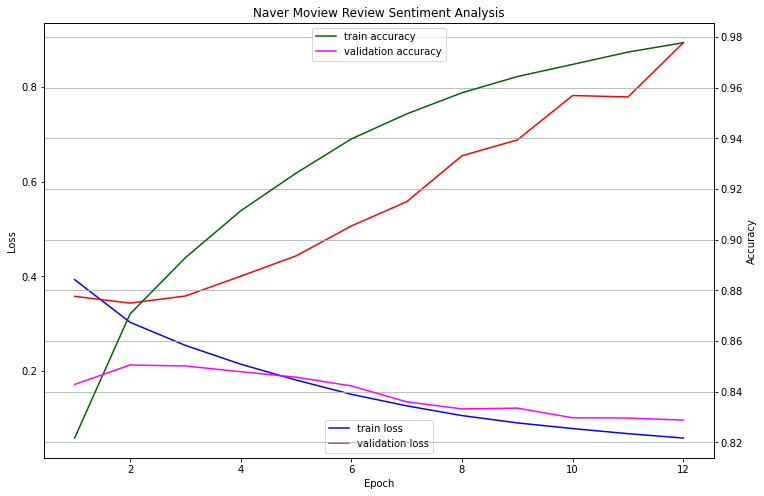

In [51]:
# X축은 공유
# y축의 좌측: loss, y축의 우측: accuracy
import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(figsize=(12,8))
ax1 = ax0.twinx()
ax0.plot(xs, y_loss, c='blue', label='train loss')
ax0.plot(xs, y_vloss, c='red', label='validation loss')
ax0.set_ylabel('Loss')
ax0.set_xlabel('Epoch')
ax1.plot(xs, y_acc, c='darkgreen', label='train accuracy')
ax1.plot(xs, y_vacc, c='magenta', label='validation accuracy')
ax1.set_ylabel('Accuracy')
ax0.legend(loc='lower center'); ax1.legend(loc='upper center')
plt.title('Naver Moview Review Sentiment Analysis')
plt.grid(); plt.show()